## K8 Concepts
____

+ PODs
+ PODs Demo


## What are PODS
___


So at this point we can assume:

1. The Docker image has been created with out application on it. Ans it is available in a docker repository like docker hub. So K8s can pulll it down
2. Kubernets cluster has been setup, whether single node or multinode setup, but all the servies needs to be in a running state.
3. 


Remember with K8s, the ultimate aim is to deploy the application as containers, on a set of machines that are configurated as worker nodes  in a cluster

But here is the essence: K8s do not deploy container directly on the worker nodes. The containers are encapsulated into a K8s object called pods.


A POD is a single instance of an application:

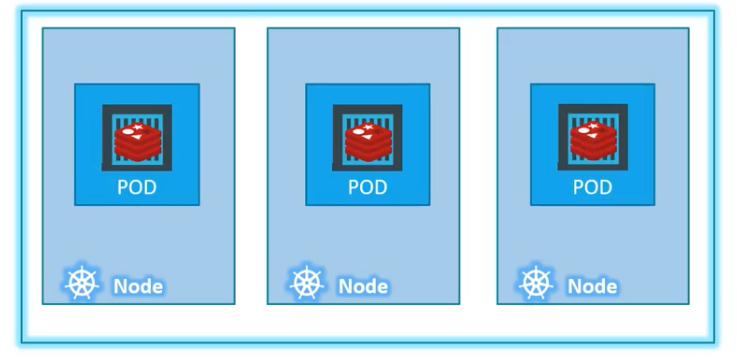

This is the smallest object you can create in K8s


When your application grows, and you need more resources, do we add add a new instance of out application in the same pod? No. We create a new pod, with another instance of our application. That is two instances of out app running on two separate pods, on the same node.

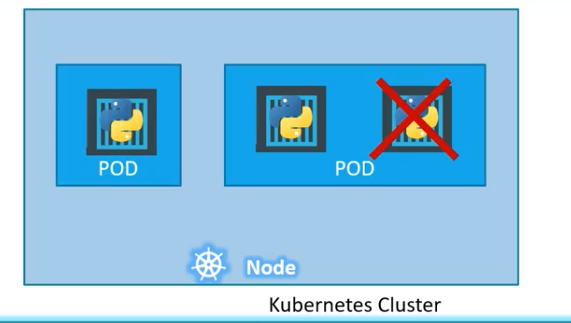

But what if the app still need more resources as the userbase increases, what do we do next? We increase the number of worker nodes, with a new instance of app on another pod.

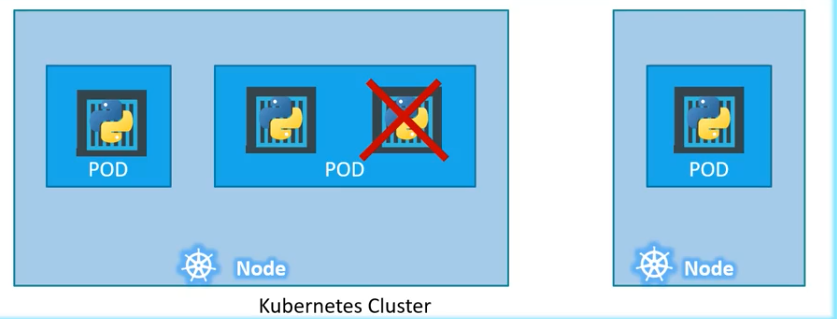


So main point here: Pods have a one to one relationship with running containers, and to scale up, we create new pods, and  scale down, then we delete pods. You do not add additional containers to existing pods.


We know we said container per pod, but is this a hard and fast rule, it depends...we can have pods with muliple container, however they normally containers of a different kind.E,g sometimes you have a helper container, that is used by the main app, then we can group them in the same pod: architecturally it makes more sense. And they can communicate with each other as they share the same network space, and storage space.

Since the main app and helper app lives in the same pod, k8s manages it for us, and we do not need to worry about linking, network and storage, i.e what we would have done, it they where not together in the same pod.


But remember, multipod contianer pods are a rear case. We will stick to single containers in a POD.

How do we go about and deploy pods? We previously used the ```kubectl``` command to deploy a container.

```
kubectl run nginx



```

what does command really do, is deploy a docker container, by creating a POD. So its first creates a POD automatically, the it deploys an instance of the nginx image 

But where does it get the app image from? for that we need to specify the image using the --image parameter. The imahe is downloaded from the docker hub repository.


```
kubectl run nginx --image nginx

```

Now the pod is created, how do we see the list of pods created? 




```
kubectl get pods

```

So for this pod cannot be accessed from the outside, but it can be access internally from the node.

(Dealing with networks later on, we will see how to make this service accessible to end users)




## PODs Demo

____

See page 4 (to do the setup again)

First get the status of the nodes again.

```
sudo kubectl get nodes
```

Then get output:

```
NAME         STATUS   ROLES    AGE   VERSION
kubemaster   Ready    master   33m   v1.18.2
kubenode-1   Ready    <none>   78s   v1.18.2
```

We can the deploy a pod by using the kubectl run --image command

```
kubectl run nginx --image=nginx
```

Now can see the list of pods

```
kubectl get pods

```

Now get the following output:

```
NAME    READY   STATUS    RESTARTS   AGE
nginx   1/1     Running   0          45s
```

To get more information about a pod, we use describe command.This will list detailed information about the pods.

1. Which worker node it is runningon
2. Name of image that was used
3. Events that followed the creation of the pods
4. Etc

```
kubectl describe pods

```

Running with ```-o wide``` parameter. Now we have two additional fields: ip (which is the pods own ip) and node (it is running on)

```
kubectl get pods -o wide

```

```
NAME    READY   STATUS    RESTARTS   AGE     IP           NODE         NOMINATED NODE   READINESS GATES
nginx   1/1     Running   0          6m12s   10.217.1.5   kubenode-1   <none>           <none>

```

Later we will see how this POD fits into other components....that is replicasets and deployments.


## 

## 